### Cool Examples

The first example serve as a reminder of the powerful capabilities of IPython and Scientific Python.
The next two examples demonstrate the data science philosphy of quanitifying well known knowledge and get insights into the data.

- [Timeseries Classification: KNN & DTW](http://nbviewer.ipython.org/github/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping/blob/master/K_Nearest_Neighbor_Dynamic_Time_Warping.ipynb)


- [Messi is impossible](http://fivethirtyeight.com/features/lionel-messi-is-impossible/)


- [Bagel Price Analysis](http://www.seriouseats.com/2014/07/bagelnomics-best-bagel-pricing-nyc.html)

# Machine Learning Using Scikits-Learn

### Goals
This is a tutorial on how to build machine learning systems and analyze their performance.
We are not going to discuss the details of the learning algorithms and how they work.
We will focus on understanding their behavior and analyze their performance.

#### Advice
Refer to [Coursera Online course](https://www.coursera.org/course/ml) on machine learning as offered by Andrew Ng.
It contains easy to digest description of linear regression, logistic regression, neural network, support vector machines, k-means and PCA.

#### Imports

In [3]:
import numpy as np
from __future__ import print_function

In [4]:
from ipywidgets import *
from ipywidgets import interact, RadioButtons, FloatSlider

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [7]:
import matplotlib
matplotlib.rcParams.update({
  "lines.linewidth": 2.0,
  #"examples.download": True,
  "axes.edgecolor": "#bcbcbc",
  "patch.linewidth": 0.5,
  "legend.fancybox": True,
  "axes.color_cycle": ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457", "#188487", "#E24A33"],
  "axes.facecolor": "#eeeeee",
  "axes.labelsize": "large",
  "axes.grid": True,
  "patch.edgecolor": "#eeeeee",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
  "examples.directory": ""
})

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


**Note**: This tutorial is tested under this version of Scikits-learn

In [8]:
import sklearn
print("Scikits-learn version is", sklearn.__version__)

Scikits-learn version is 0.17.1


## Cheat Sheet

At the end of this tutorial will you learn so many algorithms for the first time, print this cheat sheet and keep it above your desk to guide you selecting the appropriate technique and model for your analysis.

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width="100%">

# Regression

[LinearRegression](http://en.wikipedia.org/wiki/Least_squares), in it’s simplest form, fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear models assumes that:

$y = X\beta + \epsilon$

- $X \in \mathbb{R}^{m\times d}$: data,
- $y \in \mathbb{R}^{m}$: target variable,
- $\beta \in \mathbb{R}^{d}$: Coefficients,
- $\epsilon \in \mathbb{R}^d$: Observation noise

Search for $\beta$ that minimizes $||y - X\beta||_2^2$



### Diabetes dataset

Given the patient blood enzymes levels, we would like to predict the insulin in his blood stream. Notice, that our target variable is **continuous**, therefore, we need to use a regression model.

I am going to choose one feature $X_2$ to simplify the visualization of the model parameters. The original dataset has 10 features ($X_1-X_{10}$).

Description of the diabetes dataset is available at [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Diabetes). 

In [31]:
from sklearn.datasets import load_diabetes

The feature array $X$ is a matrix where each row represents an example.

In [32]:
diabetes = load_diabetes()
features = diabetes.data[:, 2][:, np.newaxis]
X1 = features
y1 = diabetes.target

#### Data fitting

Try to change the `slope` and `bias` to reduce the residual sum of squares (error).
What is the smallest value you can produce?
Our goal in regression is to learn {`slope`, `bias`} that minimizes the error term.

Notice, that we are asumming that the data fits a line, that does not have to be true. Howeover, we would like to find the best solution under this assumption.

Slope = 1000.0, Bias = 100.0
Residual sum of squares: 10910.23


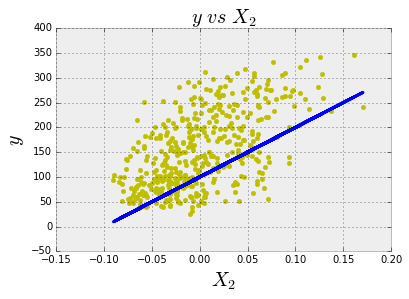

In [33]:
def plot_line(slope, bias):
  plt.scatter(X1, y1,  color='y')
  plt.xlabel("$X_2$", fontsize=20); plt.ylabel("$y$", fontsize=20)
  _ = plt.title("$y\,\,vs\,\,X_2$", fontsize=20)
  predictions = slope * X1 + bias
  plt.plot(X1, predictions, color='blue', linewidth=3)
  print("Slope = {}, Bias = {}".format(slope, bias))
  print("Residual sum of squares: %.2f"
      % np.mean((predictions - y1) ** 2))

_ = interact(plot_line,
         slope=FloatSlider(min=0, max=2000, step=50, value=1000),
         bias=FloatSlider(min=0, max=300, step=30, value=100))

#### Linear Model

In [34]:
from sklearn.linear_model import LinearRegression

- `bias` term is called also `intercept`.
- If the features vary significantly in range, it pays off to `normalize` the data as a preprocessing step.

In [35]:
model = LinearRegression()
model = model.fit(X1, y1)
predictions = model.predict(X1)
print("Model is trained with the following params: {}".format(model.get_params()))

Model is trained with the following params: {'copy_X': True, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True}


Slope = 949.435260384, Bias = 152.133484163
Residual sum of squares: 3890.46
Variance score: 0.34


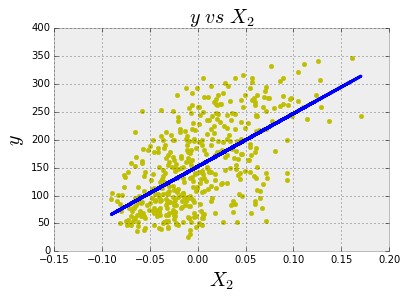

In [36]:
print("Slope = {}, Bias = {}".format(model.coef_[0], model.intercept_))
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((predictions - y1) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X1, y1))

# Plot outputs
plt.scatter(X1, y1,  color='y')
plt.plot(X1, predictions, color='blue', linewidth=3)
plt.xlabel("$X_2$", fontsize=20); plt.ylabel("$y$", fontsize=20)
_ = plt.title("$y\,\,vs\,\,X_2$", fontsize=20)

# Classification

### Iris Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Notice, that we want to predict a categorial variable (**discrete** variable).
We need to assign every reading a specific class.
To simplify the visualization, I will choose the first two variables, sepal length and width.

In [37]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [38]:
iris = datasets.load_iris()
X2 = iris.data[:, :2]  # we only take the first two features.
Y2 = iris.target

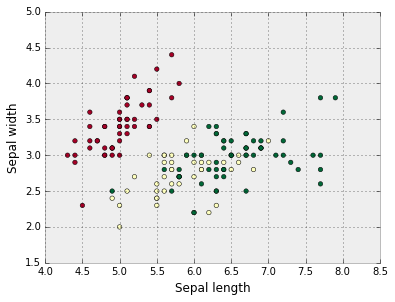

In [39]:
plt.figure(1, figsize=(6, 4.5))
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
_ = plt.scatter(X2[:, 0], X2[:, 1], c=Y2, edgecolors='k', cmap=plt.cm.RdYlGn)

Notice, that regardless of what we are trying to do, scikits-learn has the same sequence of operations:
1. **Instantiate** the model with the appropriate parameters.
1. **Fit** the model to the data, the feature and the labels.
1. **Predict** the target variable.

In [40]:
model = LogisticRegression(C=1e5)
model = model.fit(X2, Y2)
predictions = model.predict(X2)

#### Accuracy

We are evaluating on the same data we used to fit the model with!
This mean that our model is performing perdictions on data points it already saw.
This gives an upper bound of the real performance of the model.
We will discuss later on how to do proper evaluation.

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print("Performance of our classifier is {:.2f}%".format(accuracy_score(Y2, predictions)*100))

Performance of our classifier is 80.67%


#### Decision boundary

We will use `meshgrid` and `pcolormesh` to visualize how the model splits the spatial regions among classes.

In [43]:
h2 = .02  # step size in the mesh
x_min2, x_max2 = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min2, y_max2 = X2[:, 1].min() - .5, X2[:, 1].max() + .5
xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, h2), np.arange(y_min2, y_max2, h2))
Z2 = model.predict(np.c_[xx2.ravel(), yy2.ravel()])
# Put the result into a color plot
Z2 = Z2.reshape(xx2.shape)

now, we will add the original classes of our flowers.

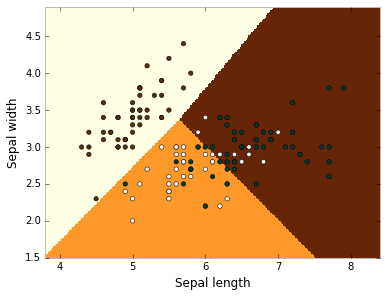

In [44]:
plt.figure(1, figsize=(6, 4.5))
plt.pcolormesh(xx2, yy2, Z2, cmap=plt.cm.YlOrBr)
plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
plt.xlim(xx2.min(), xx2.max()); plt.ylim(yy2.min(), yy2.max())
_ = plt.scatter(X2[:, 0], X2[:, 1], c=Y2, edgecolors='k', cmap=plt.cm.BrBG)

As the model is linear, the boundaries are linear.
We made an assumption that the data is linearly separable.
The decision boundary shows that it is easier to split the first class from the other two.

# Model Complexity

Choosing the right model in machine learning is an art.
Complex models tend to memorize the data they saw and not generalize very well to new instances.
Simple models tend to over-generalize and not capture all data intricacies.
It requires experience and understanding of the various tradeoffs between algorithm capacity and data quality to reach the right model.

Various points could change the model capacity:

- **Choice of features**: In general, more features increase the model capacity.
  - Automatic features: We can generate extra features automatically, using polynomial features.
  
  - Domain knowledge: Given our expertise in the problem we can synthesize new features. For example, trying to detect if a word is a verb or not, we can add a feature detecting if the suffix of the current word is `ed`.



- **Feature preprocessing**: preprocessing steps as normalization or dimensionality reduction could simplify numerical optimization leading to better models.



- **Choice of algorithm**: Some models like logistic regression has linear decision boundaries, while others like SVM with RBF kernel or Neural network has non-linear (complex curvature) decision boundaries.



- **Regularization**: We can lower the model capacity by imposing constraints on the optimization methods while trying to learn the model parameters.Two common constraints/penalties are $L_1$ ([LASSO regression](http://en.wikipedia.org/wiki/Least_squares#Lasso_method)) and $L_2$ ([ridge regression](http://en.wikipedia.org/wiki/Tikhonov_regularization)).

While we learn the model's parameters directly from data, the above choices has to be set by the data scientist.
We call these choices **hyperparameters** to distinguish them from parameters learned from the data.
Through this tutorial, we will learn how to analyze these choices and setup an environment to pick them autotmatically driven by data analysis.

## Polynomial features
We can synthesize new features by introducing interactions between the current features.
If we are using currently $x_1$ and $x_2$, we can introduce a new feature $x_1x_2$.

Given that our feature set is {$x_1$, $x_2$} using the Preprocessing stage `PolynomialFeatures` will introduce the following features:
- Degree 1: $x_1$, $x_2$
- Degree 2: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$
- Degree 3: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1x_2$, $x_1^3$, $x_2^3$, $x_1^2x_2$, $x_1x_2^2$

**Notes**:
- Be aware that the number of features in the output array scales polynomially in the number of features of the input array, and exponentially in the degree.
- High degrees can cause overfitting.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
np.random.seed(0)
n_samples = 20
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.15

We can stage two operations, in this case, generating features and training a regressor using the class *Pipeline*. Notice, lines 9 and 10.

In [11]:
def regressor(degree):
  plt.figure(figsize=(6, 4.5))
  ax = plt.subplot(1, 1, 1)
  plt.setp(ax, xticks=(), yticks=())
  degree = int(degree)
  polynomial_features = PolynomialFeatures(degree=degree,
                                           include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X3[:, np.newaxis], y3)

  plt.plot(X3, pipeline.predict(X3[:, np.newaxis]), label="Model")
  plt.plot(X3, true_fun(X3), label="True function")
  plt.scatter(X3, y3, label="Samples")
  plt.xlabel("$x$", fontsize=20); plt.ylabel("$y=cos(1.5\pi x)$", fontsize=20); plt.xlim((0, 1)); plt.ylim((-1.5, 1.5))
  plt.legend(loc="best")
  plt.title("Degree %d" % degree)

**Note:** Increasing model complexity does not imply necessarily producing better models.

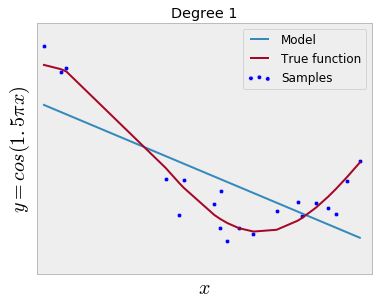

In [13]:
_ = interact(regressor, degree=FloatSlider(min=1, max=60, step=1, value=1))

This example demonstrates the problems of **underfitting** and **overfitting**.
Moreover, we can use linear regression with polynomial features to approximate nonlinear functions.
The models have polynomial features of different degrees.

The plot shows the function that we want to approximate, which is a part of the cosine function ($y=cos(1.5\pi x)$) and the learned function.

We can vary the degree of the polynomial features, to change the model capacity.
We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples.
This is called **underfitting**.
A polynomial of degree 2-7 approximates the true function almost perfectly.
However, for higher degrees (degree 7) the model will **overfit** the training data, i.e. it learns the noise of the training data.

## Choice of Classifiers

We can change model capacity by changing the algorithm used to learn the decision boundaries.
Models vary by their upper bound capacity to represent data.
Non-linear classifiers and models tend to overfit to data quickly and require regualization to lower their capacity.

The following demonstration is a comparison of several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.
Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.
The plots show training points in solid colors and testing points semi-transparent.
The lower right shows the classification accuracy on the test set.

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

/usr/local/lib/python2.7/dist-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


### Classifiers Choice

Parameters as {`C`, `kernel`, `max_depth`, `n_estimators`, `max_features`} are hyperparameters. They are set manually in this example

In [50]:
clfs_names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
              "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
clfs = [KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        AdaBoostClassifier(),
        GaussianNB(),
        LDA(),
        QDA()]
classifiers = dict(zip(clfs_names, clfs))

### Datasets

In [51]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

ds_names = ['moons', 'circles', 'iris 2 flowers', 'sandwitches']
ds = [make_moons(noise=0.3, random_state=0),
      make_circles(noise=0.2, factor=0.5, random_state=1),
      (iris.data[:, :2], iris.target == 0),
      linearly_separable
     ]
datasets = dict(zip(ds_names, ds))

In [52]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = 0.2

#### Plot dataset

In [53]:
def plot_ds(ds_name):
  ds = datasets[ds_name]
  X, y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  # just plot the dataset first
  ax = plt.subplot(1, 2, 1)
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
  # and testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(ds_name)
  return ds, xx ,yy

#### Build classifier

In [54]:
def classify(dataset_name, classifier_name):
  clf = classifiers[classifier_name]
  figure = plt.figure(figsize=(10, 5))
  (X,y), xx, yy = plot_ds(dataset_name)
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

  ax = plt.subplot(1, 2, 2)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  # Plot also the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
  # and testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
             alpha=0.6)

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(classifier_name)
  ax.text(xx.max() - .3, yy.min() + .3, ('Accuracy=%.2f' % score).lstrip('0'),
          size=15, horizontalalignment='right')

In [55]:
from IPython.html.widgets import interact, RadioButtons, FloatSlider, Dropdown

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [56]:
clfs_names, ds_names

(['Nearest Neighbors',
  'Linear SVM',
  'RBF SVM',
  'Decision Tree',
  'Random Forest',
  'AdaBoost',
  'Naive Bayes',
  'LDA',
  'QDA'],
 ['moons', 'circles', 'iris 2 flowers', 'sandwitches'])

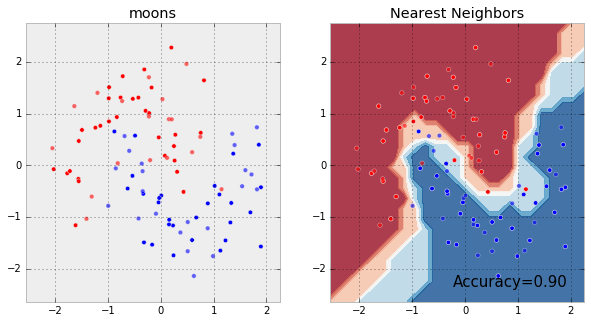

In [57]:
_ = interact(classify,
             classifier_name=Dropdown(options=clfs_names),
             dataset_name=RadioButtons(options=ds_names))

Darker areas means that the classifier is more confident in its own prediction than lighter areas.
Notice, that there is no classifier that outperforms others on all datasets. This fact is known to be "**No Free Lunch**" theorem.

## Regularization

In statistics and machine learning, regularization methods reduce the model complexity, in particular to prevent overfitting by penalizing models with extreme parameter values.
The most common variants in machine learning are $L_1$ and $L_2$ regularization, which can be added to learning algorithms that minimize a loss function $E(X, Y)$ by instead minimizing $E(X, Y) + \alpha ‖w‖$, where w is the model's weight vector, $‖·‖$ is either the $L_1$ norm or the squared $L_2$ norm, and $\alpha=1/C$ (See Line 6) is a free parameter that needs to be tuned empirically.

This method applies to many models. When applied in linear regression, the resulting models are termed ridge regression or lasso, but regularization is also employed in (binary and multiclass) logistic regression, neural nets, support vector machines, conditional random fields and some matrix decomposition methods. $L_2$ regularization may also be called "weight decay", in particular in the setting of neural nets.

In [58]:
from sklearn import svm

In [59]:
def svm_classify(alpha):
  xx, yy = np.meshgrid(np.linspace(3, 9, 500),
                       np.linspace(1, 5, 500))
  X, Y = (iris.data[:, :2], iris.target == 2)
  # fit the model
  clf = svm.SVC(C=1.0/alpha, gamma=5)
  clf.fit(X, Y)

  plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
  # plot the decision function for each datapoint on the grid
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.imshow(Z, interpolation='nearest',
             extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
             origin='lower', cmap=plt.cm.PuOr_r)
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                         linetypes='--')
  plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
  plt.axis([3, 9, 1, 5])

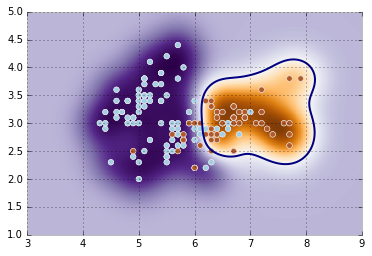

In [60]:
_ = interact(svm_classify, alpha=Dropdown(options=[3, 1,  0.3, 1e-1, 1e-2, 1e-3, 1e-6]))

Choose the following values for $\alpha$:
  - 3.0
  - 0.1
  - 0.001
  
Notice the difference in the complexity of the decision boundary, which boundary you prefer?

# Model Selection

We saw that we can vary the model capacity by changing the feature set, classificaion algorithm, or adding constraints on learned parameters through regularization.
To select the best setting to model data, we need to agree on which criterion we want to optimize for.

The following example shows how the model perform differently on **training data** (instances used to fit the model) compared to **testing data** (new unseen instances at the training time).
Ultimately, we care about the model performance on new unseen instances, as we already the true answers of the training data.

In [61]:
np.random.seed(0)
n_samples = 15
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X4 = np.sort(np.random.rand(n_samples))
y4 = true_fun(X4) + np.random.randn(n_samples) * 0.15

In [62]:
def regressor2(degree):
  if not degree:
    return
  degree = int(degree)
  fig, axes = plt.subplots(1, 3, sharey=False)
  fig.set_size_inches((18,6))
  polynomial_features = PolynomialFeatures(degree=degree,
                                           include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X4[:, np.newaxis], y4)

  train_predictions = pipeline.predict(X4[:, np.newaxis])
  Y_train = true_fun(X4)
  train_err = np.mean((train_predictions -  Y_train) ** 2)
  

  X_test = np.linspace(0, 1, 100)
  test_predictions = pipeline.predict(X_test[:, np.newaxis])  
  Y_test = true_fun(X_test)
  test_err = np.mean((test_predictions -  Y_test) ** 2)

  axes[0].plot(X4, Y_train)
  axes[0].set_title("True function")
  axes[1].plot(X4, train_predictions)
  axes[1].set_title("Seen samples")
  
  axes[1].text(0, 0, ('Error=%.2f' % train_err),
          size=15, horizontalalignment='left', verticalalignment='bottom')

  axes[2].plot(X_test, test_predictions)
  axes[2].text(0, 0, ('Error=%.2f' % test_err),
          size=15, horizontalalignment='left', verticalalignment='bottom')

  _ = axes[2].set_title("Unseen samples")
  return test_err, train_err

In this demo, we vary one hyperparameter (degree of polynormial feature)

(0.28494940862702511, 0.18850928015712762)

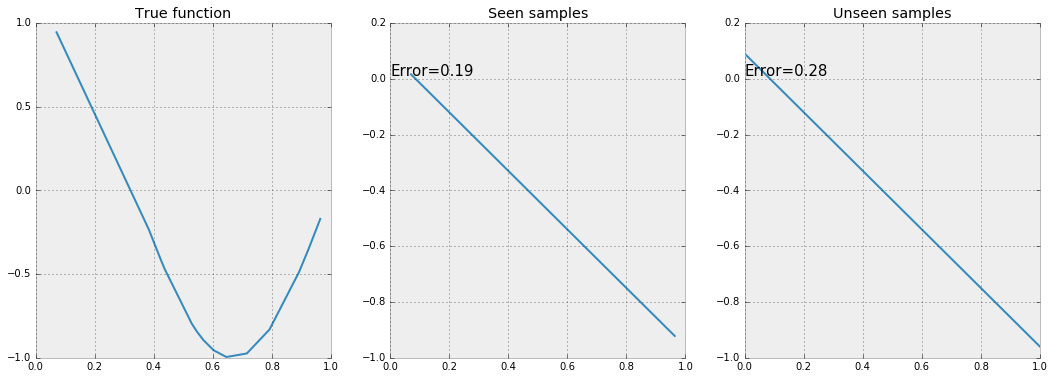

In [63]:
_ = interact(regressor2, degree=FloatSlider(min=1, max=60, step=1, value=1))

### Sweeping the hyperparameter

In [64]:
def regressor3(degree):
  polynomial_features = PolynomialFeatures(degree=degree,
                                           include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X4[:, np.newaxis], y4)
  train_predictions = pipeline.predict(X4[:, np.newaxis])
  Y_train = true_fun(X4)
  train_err = np.mean((train_predictions -  Y_train) ** 2)
  X_test = np.linspace(0, 1, 100)
  test_predictions = pipeline.predict(X_test[:, np.newaxis])  
  Y_test = true_fun(X_test)
  test_err = np.mean((test_predictions -  Y_test) ** 2)
  return test_err, train_err

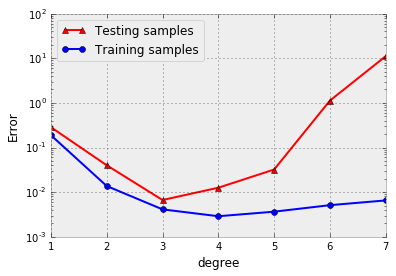

In [65]:
degrees = range(1, 8)
errors = np.array([regressor3(d) for d in degrees])
plt.plot(degrees, errors[:, 0], marker='^', c='r', label='Testing samples')
plt.plot(degrees, errors[:, 1], marker='o', c='b', label='Training samples')
plt.yscale('log')
plt.xlabel("degree"); plt.ylabel("Error")
_ = plt.legend(loc='best')

By sweeping the degree we discover two regions of model performance:

  - **Underfitting** (degree < 3): Characterized by the fact that the testing error will get lower if we increase the model capacity.


  - **Overfitting** (degree > 3): Characterized by the fact the testing will get higher if we increase the model capacity. Note, that the training error is getting lower or just staying the same!.

Observing the training error will give the wrong impression about the model performance.
It is not hard to build a model that has 0 errors or 100% accuracy, by building a lookup table that stores the label/value of each problem instance in the training dataset.

This observation leads us to realize the importance of evaluating the model performance on unseen data.

Given constant size dataset, we should split *randomly* the dataset into two parts:
1. **Training dataset**
1. **Testing dataset**

# Grid Search

Grid search is the process of searching for the optimal set of hyperparameters by evaluating all possible combinations of hyperparameters on a cross-validation dataset.
We split the training dataset further into:

1. **Training dataset**
1. **Cross-validation dataset**

Note, we never use the testing dataset during training or model selection.
Samples from the testing dataset should neven seen by the model till the final evaluation.

The following example will illustrate on how to pick the right model for our previous cosine curve fitting problem.

Ridge regression is a linear regression that allows us to add $L_2$ regularization.

In [66]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge

First, We name each stage and then we refer to a hyperparameter in a specific stage with the conventional name
`stage-name`__`hyperparameter-name`.

In [67]:
from sklearn.metrics import mean_squared_error, make_scorer

In [68]:
pipeline = Pipeline([("pre1", PolynomialFeatures()),
                     ("regressor",  Ridge())])
parameters = {
  'pre1__degree': range(1, 15),
  'pre1__interaction_only': [False, True],
  'regressor__alpha': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2),
  'regressor__fit_intercept': [False, True],
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

- **scoring**: The criteria that decide which model is better evaluated on the cross-validation dataset. In classification it will be `accuracy` or `f1_score`


- **n_jobs=8**: Runs the grid search in parallel on `8` workers.


- **cv=3**: divides the training dataset into `3` equal parts. For each combination of hyperparameters, we run three iterations. Each iteration trains a model on two parts and evaluates on the remaning part. The performance will be the average of the three runs.

In [69]:
model = GridSearchCV(pipeline, parameters, scoring=scorer, n_jobs=1, cv=3, verbose=1)
model = model.fit(X4[:, np.newaxis], y4)

Fitting 3 folds for each of 448 candidates, totalling 1344 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 1344 out of 1344 | elapsed:    5.6s finished


We have 448 candidates because we have:

- 14 choices of `degree`
- 2 choices of `interaction_only`
- 8 choices of `alpha`
- 2 choices of `fit_intercept`

448  = 14 \* 2 \* 8 \* 2

We calculate the performance of each candidate, by having three cross validation iterations.

1344 = 448 \* 3

In [70]:
train_predictions = model.predict(X4[:, np.newaxis])
Y_train = true_fun(X4)
train_err = mean_squared_error(Y_train, train_predictions)
X_test = np.linspace(0, 1, 100)
test_predictions = model.predict(X_test[:, np.newaxis])  
Y_test = true_fun(X_test)
test_err = mean_squared_error(Y_test, test_predictions)

In [71]:
print("\n\nReport of the grid search")
print("===========================")
print("Training error = {:.4f}\t Testing error = {:.4f}".format(train_err, test_err))
print("Thes best hyperparameter combination as chosen by the grid search\n", model.best_params_)  



Report of the grid search
Training error = 0.0033	 Testing error = 0.0060
Thes best hyperparameter combination as chosen by the grid search
 {'regressor__fit_intercept': False, 'pre1__interaction_only': False, 'regressor__alpha': 0.0001, 'pre1__degree': 3}


The best degree is 3, which confirms our pervious manual search!

### Are all hyperparameters important?

In [72]:
import pandas as pd
from pandas import DataFrame

In [73]:
def gs2df(model):
  """ Convert grid search data to a dataframe."""
  records = []
  for l in  model.grid_scores_:
    d = dict(l.parameters)
    d["mean"] = l.mean_validation_score
    d["scores"] = l.cv_validation_scores
    records.append(d)
  return DataFrame.from_records(records)

In [74]:
def plot_gsdf(df):
  """Plot the average performance of each hyperparameter."""
  for col in df.columns:
    if col == 'scores' or col == 'mean': continue
    temp = df.groupby(by=[col])[["mean"]].mean()
    kind = 'bar' if isinstance(temp.index.values[0], str) else 'line'
    y_lim = temp.values.min() *0.975, temp.values.max() * 1.025
    temp.plot(kind=kind, ylim=y_lim, marker='o')

In [75]:
# scores of a grid search
df = gs2df(model)

# This is counter-intuitive and should not happen for classification
# For more details why the scores are negative, look at
# https://github.com/scikit-learn/scikit-learn/issues/2439
df['mean'] *= -1

df.head()

,mean,pre1__degree,pre1__interaction_only,regressor__alpha,regressor__fit_intercept,scores
0,1.586537,1,False,0.00001,False,"[-2.15183132755, -0.322964405228, -2.28481454776]"
1,1.586568,1,False,0.00001,True,"[-2.15189910988, -0.322964874614, -2.28483865444]"
2,1.585520,1,False,0.00010,False,"[-2.15055228729, -0.32295515049, -2.28305280992]"
3,1.585828,1,False,0.00010,True,"[-2.15122941479, -0.322959842746, -2.28329353293]"
4,1.575430,1,False,0.00100,False,"[-2.13786380195, -0.322862831695, -2.26556273882]"


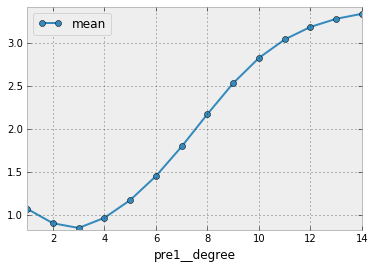

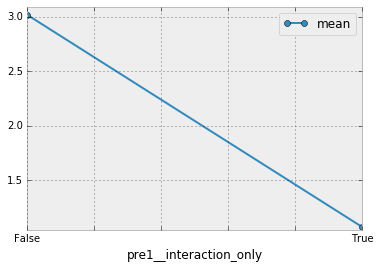

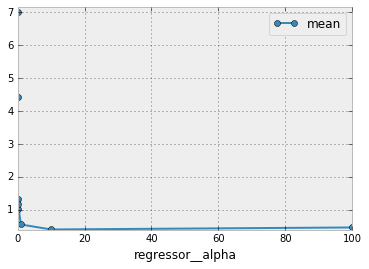

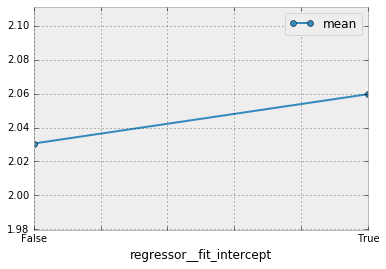

In [76]:
plot_gsdf(df)

**Conclusion**: In this example, varying the hyperparameters of the regressor is not as important as varying the hyperparameters of the feature generator.

# Learning Curve

A learning curve is a plot of the training and cross-validation error as a function of the number of training points.
Note that when we train on a small subset of the training data, the training error is computed using this subset, not the full training set.
These plots can give a quantitative view into how beneficial it will be to add training samples.

In [77]:
from sklearn.datasets import load_digits
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

In [78]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation accuracy")

    plt.legend(loc="best")
    return plt

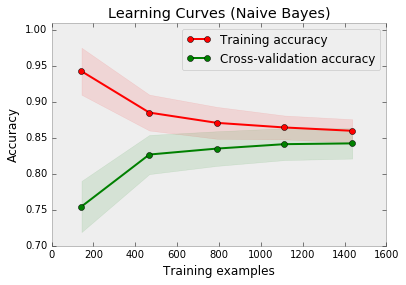

In [79]:
digits = load_digits()
X5, y5 = digits.data, digits.target
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = GaussianNB()
__ = plot_learning_curve(estimator, title, X5, y5, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

# Practical Advice

## High Bias (Underfitting)

If our algorithm shows high bias, the following actions might help:

- **Add more features**. 


- **Use a more sophisticated model**. Adding complexity to the model can help improve on bias. Switching from a linear classifier to non-linear one could reduce the bias.


- **Decrease regularization**. Regularization is a technique used to impose simplicity in some machine learning models, by adding a penalty term that depends on the characteristics of the parameters. If a model has high bias, decreasing the effect of regularization can lead to better results.


## High Variance (Overfitting)

If our algorithm shows high variance, the following actions might help:

- **Use fewer features**. Using a feature selection technique may be useful, and decrease the over-fitting of the estimator.


- **Use more training samples**. Adding training samples can reduce the effect of over-fitting, and lead to improvements in a high variance estimator.


- **Increase Regularization**. Regularization is designed to prevent over-fitting. In a high-variance model, increasing regularization can lead to better results.


These choices become very important in real-world situations. For example, due to limited telescope time, astronomers must seek a balance between observing a large number of objects, and observing a large number of features for each object. Determining which is more important for a particular learning task can inform the observing strategy that the astronomer employs.

# Classification Metrics

## Binary Case

### Accuracy
$
\text{accuracy}=\frac{\text{true positives}+\text{true negatives}}{\text{number of examples}}$

Not good if the classes are imabalanced.

In binary classification, If 90% of the labels belong to the negative class, we can build easily a classifier with 90% accuracy by assigning all labels to the most frequent one.

You should use instead $F_1$

### $F_1$

$\text{precision}=\frac{\text{true positives}}{\text{true positives}+\text{false positives}}$



$\text{Recall}=\frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$



$F_1 = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$


In binary classification, If 90% of the labels belong to the negative class, we can build easily a classifier with 90% accuracy, however, the precision is 100% and the recall is 0%.


## Multi-class Case

### Micro-average F1 score

Calculate $F_1$ for each class alone, then compute **weighted-average** them according to their frequency. (Similar to accuracy).

### Macro-average F1 score

Calculate $F_1$ for each class alone, then compute **average**  regardless of their frequency.

# Working with text

### Dataset

The dataset is called [Twenty Newsgroups](http://qwone.com/~jason/20Newsgroups/).
In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [80]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

The returned dataset is a scikit-learn “bunch”: a simple holder object with fields that can be both accessed as python dict keys or object attributes for convenience, for instance the target_names holds the list of the requested category names

In [81]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

The files themselves are loaded in memory in the data attribute. For reference the filenames are also available:

In [82]:
len(twenty_train.data)

2257

In [83]:
len(twenty_train.filenames)

2257

Let’s print the first lines of the first loaded file

In [84]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


Supervised learning algorithms will require a category label for each document in the training set. In this case the category is the name of the newsgroup which also happens to be the name of the folder holding the individual documents.


For speed and space efficiency reasons scikit-learn loads the target attribute as an array of integers that corresponds to the index of the category name in the target_names list. The category integer id of each sample is stored in the target attribute:

In [85]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

## Bag of words

The most intuitive way to do so is the bags of words representation:

1. assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).

1. for each document $i$, count the number of occurrences of each word w and store it in $X[i, j]$ as the value of feature $j$ where $j$ is the index of word $w$ in the dictionary

The bags of words representation implies that `n_features` is the number of distinct words in the corpus: this number is typically larger that 100,000.

If `n_samples == 10000`, storing X as a numpy array of type `float32` would require $10000 \times 100000 \times 4$ bytes = 4GB in RAM which is barely manageable on today’s computers.
Fortunately, most values in X will be zeros since for a given document less than a couple thousands of distinct words will be used. For this reason we say that bags of words are typically high-dimensional sparse datasets. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory.
scipy.sparse matrices are data structures that do exactly this, and scikit-learn has built-in support for these structures.

### Tokenizing

Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors:

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

CountVectorizer supports counts of N-grams of words or consequective characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [87]:
count_vect.vocabulary_.get(u'algorithm')

4690

The index value of a word in the vocabulary is linked to its frequency in the whole training corpus.

### From occurrences to frequencies

Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.
  
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows:

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In the above example-code, we firstly use the `fit(..)` method to fit our estimator to the data and secondly the `transform(..)` method to transform our count-matrix to a tf-idf representation. These two steps can be combined to achieve the same end result faster by skipping redundant processing. This is done through using the `fit_transform(..)` method as shown below, and as mentioned in the note in the previous section:

In [89]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

### Training a classifier

Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [90]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

To try to predict the outcome on a new document we need to extract the features using almost the same feature extracting chain as before. The difference is that we call transform instead of `fit_transform` on the transformers, since they have already been fit to the training set:

In [91]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


### Pipeline

In [92]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [93]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5)),
])
_ = text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(twenty_test.data)
print("Accuracy of our SGD classifier is {:.2f}%".format(np.mean(predicted == twenty_test.target)*100))

Accuracy of our SGD classifier is 91.15%


In [94]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
      target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.96      0.80      0.87       319
         comp.graphics       0.88      0.98      0.93       389
               sci.med       0.94      0.89      0.92       396
soc.religion.christian       0.89      0.95      0.92       398

           avg / total       0.92      0.91      0.91      1502



# Clustering

[Cluster analysis](http://en.wikipedia.org/wiki/Cluster_analysis) or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, and bioinformatics.

In [95]:
import time
from sklearn import datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (MeanShift, MiniBatchKMeans, AffinityPropagation, AgglomerativeClustering,
                             DBSCAN, SpectralClustering)
import sklearn.cluster

In [96]:
np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 150
datasets_collection = {
"noisy_circles": datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05),
"noisy_moons" :datasets.make_moons(n_samples=n_samples, noise=.05),
"blobs": datasets.make_blobs(n_samples=n_samples, random_state=8),
"no_structure": (np.random.rand(n_samples, 2), None),
}

In [97]:
clustering_algos = {
    # create clustering estimators
    "mean_shift": MeanShift(bin_seeding=True),
    "two_means": MiniBatchKMeans(n_clusters=2),
    "agglomerative": AgglomerativeClustering(n_clusters=2,
                    linkage='ward'),
    "spectral": SpectralClustering(n_clusters=2,
                                   eigen_solver='arpack',
                                   affinity="nearest_neighbors"),
    "dbscan": DBSCAN(eps=.2),
    "affinity_propagation": AffinityPropagation(damping=.9, preference=-200),
    "average_linkage":  AgglomerativeClustering(linkage="average",
                            affinity="cityblock", n_clusters=2)
}

In [98]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

In [99]:
def cluster(ds_name, algo_name):
  dataset = datasets_collection[ds_name]
  algorithm = clustering_algos[algo_name]
  X, y = dataset
  # normalize dataset for easier parameter selection
  X = StandardScaler().fit_transform(X)

  # estimate bandwidth for mean shift
  bandwidth = sklearn.cluster.estimate_bandwidth(X, quantile=0.3)

  # connectivity matrix for structured Ward
  connectivity = kneighbors_graph(X, n_neighbors=10)
  # make connectivity symmetric
  connectivity = 0.5 * (connectivity + connectivity.T)

  # Compute distances
  #distances = np.exp(-euclidean_distances(X))
  distances = euclidean_distances(X)
  # predict cluster memberships
  t0 = time.time()
  algorithm.fit(X)
  t1 = time.time()
  if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
  else:
    y_pred = algorithm.predict(X)

  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches((12,4))
  axes[0].scatter(X[:, 0], X[:, 1], c='black', s=10)
  axes[0].set_title('Data')
  axes[1].scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
  axes[1].set_title('Clustered Data')

  if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
  plt.xlim(-2, 2)
  plt.ylim(-2, 2)
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
           transform=plt.gca().transAxes, size=15,
           horizontalalignment='right')

In [100]:
from IPython.html.widgets import interact, RadioButtons, FloatSlider, Dropdown

/usr/local/lib/python2.7/dist-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/manifold/spectral_embedding_.py:217: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


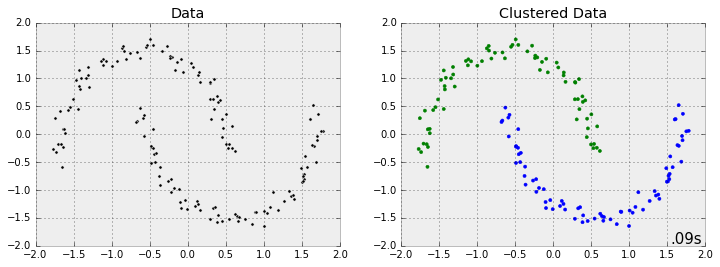

In [101]:
_ = interact(cluster,
             algo_name=Dropdown(options=clustering_algos.keys()),
             ds_name=RadioButtons(options=datasets_collection.keys()))

## References

- [Scikit-learn tutorial](http://scikit-learn.org/stable/tutorial/)


- [Scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)


- [Machine learning for Astronomy](http://www.astroml.org/sklearn_tutorial/)